# Assignment 8
### Auriana Anderson
### December 7, 2024

### The libraries you will use are already loaded for you below

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [167]:
netflix1 = pd.read_csv('Week_8/Data/credits.csv')
netflix2 = pd.read_csv('Week_8/Data/titles.csv')

genres = netflix2['genres'].dropna()

genres_cleaned = genres.apply(lambda x: x.replace('[', '')
                              .replace(']', '')
                              .replace("'", '')
                              .replace(',', '')
                              .split())

flat_genres = list(chain.from_iterable(genres_cleaned))

unique_genres = set(flat_genres)

print(unique_genres)

{'sport', 'thriller', 'music', 'documentation', 'action', 'comedy', 'western', 'crime', 'fantasy', 'family', 'scifi', 'history', 'horror', 'drama', 'animation', 'war', 'romance', 'reality', 'european'}


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [170]:
imdb_score = netflix2['imdb_score'].notnull()
release_year = netflix2['release_year'].notnull()

avg_imdb_by_year = netflix2.groupby('release_year').agg(
    mean_imdb = ('imdb_score', 'mean')
)

avg_imdb_by_year.reset_index(inplace = True)

#print(avg_imdb_by_year)

highest_avg_imdb = avg_imdb_by_year.iloc[avg_imdb_by_year['mean_imdb'].idxmax()]

print(highest_avg_imdb)

release_year    1985.0
mean_imdb          8.0
Name: 29, dtype: float64


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [173]:
netflix_combined = netflix2.merge(netflix1, how='outer', on='id')

netflix_combined = netflix_combined[netflix_combined['name'].notnull()]

actors = pd.DataFrame(netflix_combined.groupby('title')['name'].count())

actors.reset_index(inplace = True)

max_idx = actors['name'].idxmax()

actors.iloc[max_idx]

title    Les Misérables
name                208
Name: 2461, dtype: object

## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

Once Upon a Time in America
1984
8.3


Text(0.5, 0, 'IMDB Score')

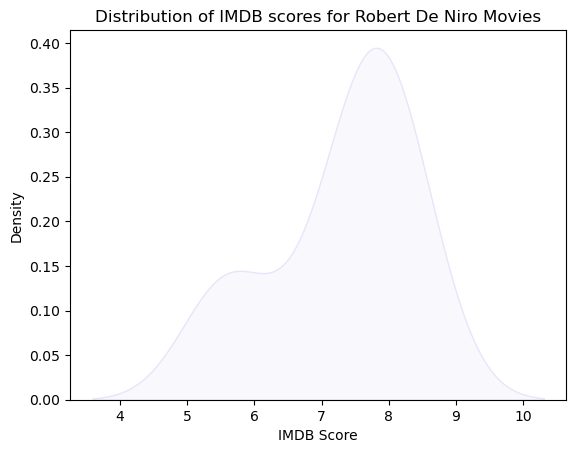

In [176]:
R_DeNiro_movies = netflix_combined[netflix_combined['name'].str.contains('Robert De Niro',
                                                                         case = False,
                                                                        na = False)]

#print(R_DeNiro_movies)

highest_imdb_DeNiro = R_DeNiro_movies.loc[R_DeNiro_movies['imdb_score'].idxmax()]

print(highest_imdb_DeNiro['title'])
print(highest_imdb_DeNiro['release_year'])
print(highest_imdb_DeNiro['imdb_score'])

sns.kdeplot(data =R_DeNiro_movies['imdb_score'],
            fill = True,
            color = 'lavender')

plt.title('Distribution of IMDB scores for Robert De Niro Movies')
plt.ylabel('Density')
plt.xlabel('IMDB Score')

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


Number of war movies: 7240
Number of gangster movies: 757
Average IMDB of war movies: 6.755879396984924
Average IMDB of gangster movies: 6.606076618229854


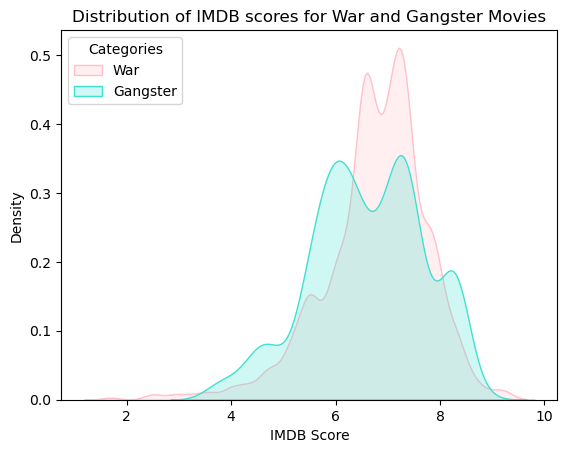

In [179]:
netflix_combined['war_movies'] = netflix_combined['description'].str.contains('war',
                                                       case = False,
                                                       na = False)

netflix_combined['gangster_movies'] = netflix_combined['description'].str.contains('gangster',
                                                      case = False,
                                                       na = False)

war_movies_count = netflix_combined['war_movies'].sum()

gangster_movies_count = netflix_combined['gangster_movies'].sum()

print(f"Number of war movies: {war_movies_count}")
print(f"Number of gangster movies: {gangster_movies_count}")

avg_war_imdb = netflix_combined[netflix_combined['war_movies']]['imdb_score'].mean()
avg_gangster_imdb = netflix_combined[netflix_combined['gangster_movies']]['imdb_score'].mean()

print(f"Average IMDB of war movies: {avg_war_imdb}")
print(f"Average IMDB of gangster movies: {avg_gangster_imdb}")

sns.kdeplot(data = netflix_combined[netflix_combined ['war_movies']]['imdb_score'],
            fill = True,
            color = 'pink',
           label = 'War')

sns.kdeplot(data = netflix_combined[netflix_combined ['gangster_movies']]['imdb_score'],
            fill = True,
            color = 'turquoise',
           label = 'Gangster')

plt.title('Distribution of IMDB scores for War and Gangster Movies')
plt.ylabel('Density')
plt.xlabel('IMDB Score')
plt.legend(title = "Categories", loc = "upper left")


How many movies are there in both categories? :
War: 7240
Gangster: 757

Which category has a higher average IMDB score? 
War Movies